In [1]:
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

# Exploration

In [2]:
df = pd.read_csv('../data/digitiser_dataset.csv', index_col=0)
df = df[df['x_questions']==20]
df.head(10)

,feedback,name,question,round,best_of_name,model_id,user_id,x_questions
0,-1,Lio,1,1,False,3dxqYZDIqnnbnJRwd9xF,x7cU2PT7nm4vlv41PTd4,20
1,-1,Sara,1,1,False,3dxqYZDIqnnbnJRwd9xF,x7cU2PT7nm4vlv41PTd4,20
2,3,Marilou,1,1,False,3dxqYZDIqnnbnJRwd9xF,x7cU2PT7nm4vlv41PTd4,20
3,-1,Chloé,1,1,False,3dxqYZDIqnnbnJRwd9xF,x7cU2PT7nm4vlv41PTd4,20
4,-1,Iluna,2,1,False,3dxqYZDIqnnbnJRwd9xF,x7cU2PT7nm4vlv41PTd4,20
5,3,Mira,2,1,False,3dxqYZDIqnnbnJRwd9xF,x7cU2PT7nm4vlv41PTd4,20
6,-1,Zoë,2,1,False,3dxqYZDIqnnbnJRwd9xF,x7cU2PT7nm4vlv41PTd4,20
7,-1,Helena,2,1,False,3dxqYZDIqnnbnJRwd9xF,x7cU2PT7nm4vlv41PTd4,20
8,-1,June,3,1,False,3dxqYZDIqnnbnJRwd9xF,x7cU2PT7nm4vlv41PTd4,20
9,3,Léa,3,1,True,3dxqYZDIqnnbnJRwd9xF,x7cU2PT7nm4vlv41PTd4,20


In [3]:
views = df['name'].value_counts()
views.head()

Anna     3164
Zoé      3071
Lou      2898
Laura    2897
Elize    2894
Name: name, dtype: int64

In [4]:
clicks = df.loc[df['feedback']==3,'name'].value_counts()
clicks.head()

Anna    1224
Lou     1205
Nora    1203
Lili    1159
Ella    1112
Name: name, dtype: int64

In [5]:
clicks_per_view = clicks / views
name_df = pd.DataFrame({'clicks':clicks, 'views':views, 'clicks_per_view':clicks_per_view})
name_df.sort_values('clicks_per_view', ascending=False).head()

,clicks,clicks_per_view,views
Charlie,1.0,1.000000,1
Minne,2.0,0.666667,3
Annabelle,2.0,0.666667,3
Ella,1112.0,0.555445,2002
Nore,501.0,0.524059,956


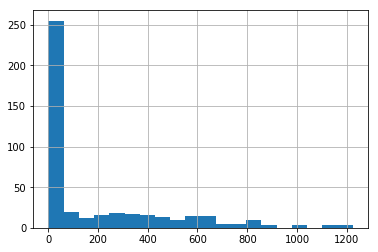

In [6]:
name_df['clicks'].hist(bins=20)

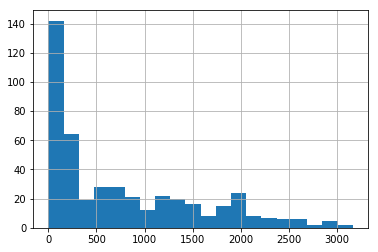

In [7]:
name_df['views'].hist(bins=20)

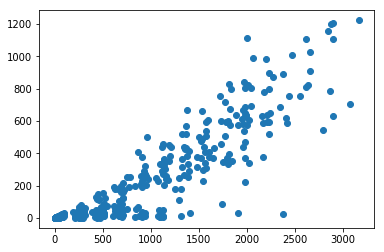

In [8]:
plt.scatter(name_df['views'], name_df['clicks'])

# Baseline

In [9]:
popularity = pd.read_csv('../data/popularity.csv')
popularity.head()

,name,sex,region,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,...,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
0,Aagje,F,Vlaanderen,0.0,10.0,7.0,6.0,5.0,0.0,12.0,...,10.0,11.0,12.0,11.0,8.0,11.0,7.0,0.0,0.0,0.0
1,Aaliyah,F,Vlaanderen,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,8.0,7.0,14.0,9.0,9.0,7.0,10.0,11.0,8.0,13.0
2,Abigail,F,Vlaanderen,0.0,0.0,8.0,0.0,0.0,0.0,5.0,...,0.0,6.0,7.0,8.0,16.0,11.0,10.0,10.0,11.0,12.0
3,Ada,F,Vlaanderen,0.0,0.0,0.0,0.0,5.0,0.0,6.0,...,12.0,19.0,17.0,20.0,24.0,19.0,28.0,32.0,35.0,27.0
4,Adeline,F,Vlaanderen,15.0,10.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,6.0,8.0,0.0,8.0,0.0,12.0


In [10]:
df['question_id'] = df['model_id'] + '_' + df['question'].astype(str)
df['question_id'].head(12)

0     3dxqYZDIqnnbnJRwd9xF_1
1     3dxqYZDIqnnbnJRwd9xF_1
2     3dxqYZDIqnnbnJRwd9xF_1
3     3dxqYZDIqnnbnJRwd9xF_1
4     3dxqYZDIqnnbnJRwd9xF_2
5     3dxqYZDIqnnbnJRwd9xF_2
6     3dxqYZDIqnnbnJRwd9xF_2
7     3dxqYZDIqnnbnJRwd9xF_2
8     3dxqYZDIqnnbnJRwd9xF_3
9     3dxqYZDIqnnbnJRwd9xF_3
10    3dxqYZDIqnnbnJRwd9xF_3
11    3dxqYZDIqnnbnJRwd9xF_3
Name: question_id, dtype: object

In [11]:
most_popular = (
    pd.merge(
        df, 
        popularity, 
        left_on = 'name', 
        right_on = 'name')
     .sort_values('year_2016', ascending=False)
     .groupby('question_id')['name'].first())
clicked = df.sort_values('feedback', ascending=False).groupby('question_id')['name'].first()

In [12]:
most_popular.head()

question_id
00329XrhSh1vtc7swjcP_1     Lucie
00329XrhSh1vtc7swjcP_11    Emily
00329XrhSh1vtc7swjcP_12     Lore
00329XrhSh1vtc7swjcP_13     Emma
00329XrhSh1vtc7swjcP_14     Ella
Name: name, dtype: object

In [13]:
clicked.head()

question_id
00329XrhSh1vtc7swjcP_1        Mona
00329XrhSh1vtc7swjcP_11    Paulien
00329XrhSh1vtc7swjcP_12       Maya
00329XrhSh1vtc7swjcP_13    Phaedra
00329XrhSh1vtc7swjcP_14        Zoé
Name: name, dtype: object

In [14]:
questions = pd.DataFrame({'most_popular':most_popular, 'clicked':clicked})
questions.head()

,clicked,most_popular
question_id,,
00329XrhSh1vtc7swjcP_1,Mona,Lucie
00329XrhSh1vtc7swjcP_11,Paulien,Emily
00329XrhSh1vtc7swjcP_12,Maya,Lore
00329XrhSh1vtc7swjcP_13,Phaedra,Emma
00329XrhSh1vtc7swjcP_14,Zoé,Ella


In [15]:
(questions['clicked'] == questions['most_popular']).mean()

0.36012228260869567